## 2. Karacisim Işıması

1900 yılının Ekim ayında Max Planck'ın güç dağılımı hesabı yayınlanmıştı.

Daha öncesinde Rayleigh tarafından yapılan elektromanyetik ışımanın güç dağılımı hesabı gözlemlerle uyumsuzdu. Öyle uyumusuzdu ki, "morötesi felaket" olarak anılmaya başlamıştı. Planck'ın yaptığı hesap gözlemlerle uyumluydu fakat o da bu sefer beklenmeyen bir sonuç getirmişti: Işıma ancak "paketçikler" halinde gerçekleşirse dağılım geçerli oluyordu! 

Hızlıca Planck dağılımına bakalım: 

$$ I_{Pl}(\lambda, T)= \frac{2\pi c^2h}{\lambda^5} \frac{1}{(e^{hc/\lambda kT}-1)}$$

Dağılım belli bir sıcaklık için dalgaboyu dağılımı olarak okunabilir. Önemli konuları sonraya bırakarak ilk önce Planck dağılımının grafiğini elde edelim ve anlamaya çalışalım:

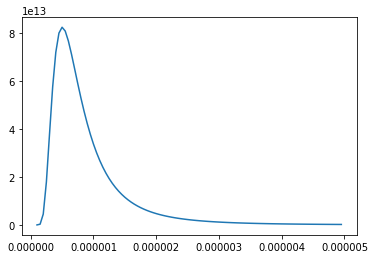

In [1]:
import numpy as nu
import matplotlib.pyplot as mplt

# Sabitler. 
cc = 299792458              # m/s    Işığın boşluktaki hızı
hh = 6.62607015*10**(-34)   # J⋅s    Planck sabiti
kk = 1.380649*10**(-23)     # J/K    Boltzmann sabiti
qq = 1.602176634*10**(-19)  # C      Elektron yükü
# Matematik sabitler
pp = nu.pi                  # pi sayısı
ee = nu.e                   # e sayısı

# Sıcaklık. İlk önce Güneş yüzeyinin sıcaklığını alalım.
Temp = 5772 # K

# Dalgaboyu, µm. 5 µm'ye kadar, 0.1 µm aralıklarla hesaplayalım.
Lambda = nu.arange(0.1, 5., 0.05)*10**(-6)

#Planck Güç Dağılımı 
PowPlanck = (2*pp*cc**2*hh/Lambda**5)*(1/(ee**(hh*cc/(Lambda*kk*Temp))-1))

#İlk önce Planck dağılımının grafiğini elde edelim:
mplt.plot(Lambda, PowPlanck)
mplt.show()

Basitçe grafiğimizi çizdik. Şimdi grafiği daha düzgün ve daha anlaşılır hale getirelim.

Önce eksenler. *x ekseni* **Dalgaboyu** ($\lambda$). Metre cinsinden, bunu µm cinsine çevirelim. 

*y ekseni* **Güç dağılımı** $I_{Pl}(\lambda, T)$. Birimi her dalgaboyunda yayınlanan Güç miktarı $(Watt/\mu m$). Bunu yüzey alanından bağımsız hale getirmek için $m^2$ ile bölmemiz lazım. Böylece birim $ Watt/m^2/\mu m$ olur.

Doğru değerlere kavuştuktan sonra eksenlerimizin adlarını ve birimlerini yazabiliriz.

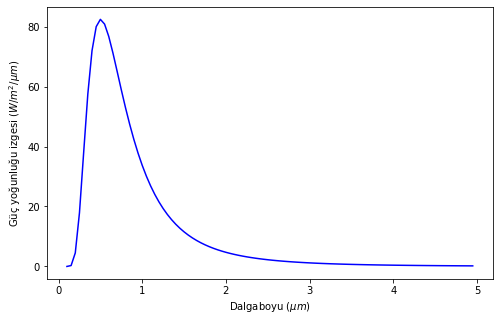

In [2]:
xx = Lambda*10**6                              # x-ekseni, µm olarak
yy = PowPlanck*10**(-12)                       # y-ekseni  m^2 bölünerek

fig, ax = mplt.subplots(figsize=(8, 5))        # Grafiğin büyüklüğü
ax.plot(xx, yy, 'b')                           # Güneş rengini mavi yapalım
ax.set_xlabel(r'Dalgaboyu ($\mu m$)')                   # x-ekseni adı 
ax.set_ylabel(r'Güç yoğunluğu izgesi ($W/m^{2}/{\mu m}$)')   # y-eksen adı

mplt.show()


Şimdi ikinci adımda farklı sıcaklıklar için dağılımımızı çizelim ve grafiğimizi biraz daha okunur yapalım:



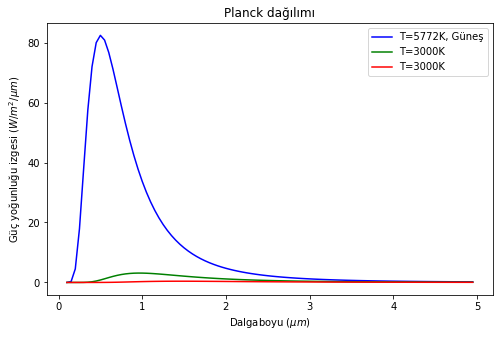

In [8]:
#Birden çok grafik çizeceğimiz için Güç dağıımını bir fonksiyon 
#olarak tanımlamak daha uygun olacaktır. Uygun birimlerle. 

def PlanckDistribution(x):
    Pow = (2*pp*cc**2*hh/Lambda**5)*(1/(ee**(hh*cc/(Lambda*kk*x))-1))*10**(-12)
    return Pow

fig, ax = mplt.subplots(figsize=(8, 5))           
ax.set_xlabel(r'Dalgaboyu ($\mu m$)')              
ax.set_ylabel(r'Güç yoğunluğu izgesi ($W/m^{2}/{\mu m}$)')   

# Güneş
TT5772 = PlanckDistribution (5772)
mplt.plot(Lambda*10**6, TT5772, 'b', label='T=5772K, Güneş')

# T=3000K
TT3000 = PlanckDistribution (3000)
mplt.plot(Lambda*10**6, TT3000, 'g', label='T=3000K')

# T=2000K
TT2000 = PlanckDistribution (2000)
mplt.plot(Lambda*10**6, TT2000, 'r', label='T=3000K')
    
mplt.title("Planck dağılımı")
mplt.legend()
mplt.show()  



(Yapılacak) Grafiğin Logaritmik gösterimi

### 2.1 Planck "büyüsü"

Planck güç dağılımını gözlemlerle uyumlu bir şekilde hesapladı. 

Planck'ın yaptığı, daha önce Rayleigh (1900 Temmuz) tarafından yapılan klasik elektromanyetik hesabı gözlemlerle uyuşturmak için matematik bir yol bulmasıydı. Daha doğrusu daha önce Boltzmann'ın geliştirdiği bir yöntemi uyguladı.O günkü fizikle uyumsuz fakat gözlemlerle uyumlu bir ışıma eğrisini Planck bu şekilde elde etti. 

Daha önce benzerini Lorentz'de görmüştük. **Fizik açısından gerekçesi belli olmayan, sadece gözlemlerle uyumlu hale getirmek için yapılan matematik cambazlıklara o zaman da "büyü" demiştik.** Gelin görün ki, bu büyüler "doğada büyü ve büyücü yoktur" diyen fiziğin temel ön kabuluyle (postüla) çeliştiği için aslında sadece yeni fiziği emreden akıl yürütmelerdi. Bu akıl yürütmenin mantığını oluşturan temel fizik gerekçeleri yavaş yavaş ortaya çıkacaktı.

Rayleigh'in klasik elektromanyetik hesabı, daha sonra Jeans'in katkısıyla aşağıdaki hali almıştı:
$$I_{RJ}(\lambda,T)= \frac{2\pi c}{\lambda^4}kT$$

Planck'ın kullandığı matematik yöntemi daha iyi anlamak için, hesapladığı dağılımı Rayleigh-Jeans cinsinden yazalım:
$$I_{Pl}=I_{RJ}.\frac{hc/\lambda kT}{e^{hc/\lambda kT}-1}$$

Buraya dikkat ederseniz $x = hc/\lambda kT$ olarak değişken dönüşümü yaparsak

$$I_{Pl}=I_{RJ}.\frac{x}{e^{x}-1}$$

olarak yazılabilir. Boltzmann'ın geliştirdiği yöntem buydu: $x$ sıfıra giderken $x/(e^{x}-1)$ çarpanı bire yakınsar. Dolayısıyla elektromanyetik dalgaların kaç tane olduğunu sayıp, gücünü hesaplarken bu çarpanı kullanarak hareket edebilirsiniz, fakat son adımda $x$ sıfıra gitmeli ve hesap olağan hale gelmeli.

Planck bu yolu izlerken fark etti ki, $h$ sıfıra gitmek yerine yerinde kalırsa gözlem sonuçlarıyla uyumlu oluyor!

Şimdi iki güç dağılımını bir arada çizerek karşılaştıralım:

In [ ]:
#Birden çok grafik çizeceğimiz için Güç dağıımını bir fonksiyon 
#olarak tanımlamak daha uygun olacaktır. Uygun birimlerle. 

def RayleighDistribution(x):
    Pow = (2*pp*cc/Lambda**4)*kk*x*10**(-12)
    return Pow

fig, ax = mplt.subplots(figsize=(8, 5))    
ax.set_xlabel('Dalgaboyu [µm]')
ax.set_ylabel('Güç yoğunluğu izgesi [W/m2/µm]')

# Farklı sıcaklıklar için denemek için sıcaklığı ayrıca tanımlayalım
TT = 1200

# Daha büyük dalgaboylarını görmek için aralığımızı değiştirelim
Lambda = nu.arange(0.5, 15., 0.1)*10**(-6)

# Planck
Pow_Planck = PlanckDistribution (TT)
mplt.plot(Lambda*10**6, Pow_Planck, 'b')

# Ayrıca çok küçük dalgaboylarında Rayleigh dağılımı "morötesi felaket"e
# yol açıcağı için, bundan kaçınalım.
Lambda = nu.arange(4., 15., 0.1)*10**(-6)

# Rayleigh
Pow_Rayleigh = RayleighDistribution (TT)
mplt.plot(Lambda*10**6, Pow_Rayleigh, 'r')


### 2.2 Planck ve "ampul" problemi

Işıma dağılımıyla o dönemin çok sayıda fizikçisi ilgilenmişti: Kirchhoff, Stefan, Boltzmann, Rubens, Pringsheim, Lummer, Wien, Lord Rayleigh, Jeans ve Planck kitapta* sayılanlardan bazıları. Eminim burada ismi anılanlardan çok daha fazlasıdır. Neden mi?

Hayır, kimse "yakın zamanda gerçekleşmesi beklenen kuantum buluşunu kimin yapacağı" üzerine bir yarış içinde değillerdi. Tam tersine, hesabının "paketçikler" gereksindiğini far eden Planck bu duruma ek açıklamalar getirme gayretindeydi.

Fizikçilerin popüler artaştırma konularından biri olmasının nedeni teknolojinin yeni getirdiği bir problem olmasıydı.

Birincisi vakum teknolojisi gelişmişti. Bunu önceki bölümde işledik.

Mesele ampul 



Planck to Wien 

Planck to Stefan

In [ ]:
Many physicists of the period—including Kirchhoff, Stefan, Boltzmann,
Rubens, Pringsheim, Lummer, Wien, Lord Rayleigh, Jeans, and Planck—had
worked on the problem. It was possible to understand the spectrum both at the
low-frequency end and at the high-frequency end, but no single theory could
account for the entire spectrum.
